**Importing important libraries**



1.   **pandas,numpy**: For data handling and numerical operations.

2.   **matplotlib, seaborn**: For visualizations.

3.   **re**: For regular expressions, used in text cleaning.

4.   **nltk**: Natural Language Toolkit, used for stopwords in text cleaning.

5.   **wordcloud**: To visualize common words in text.

6.   **scikit-learn modules**: For text vectorization, model building, and evaluation.






In [1]:
# Import necessary libraries for handling operating system paths and file operations
import os
import pickle
import joblib

# Libraries for data manipulation and handling
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for regular expression operations
import re

# NLTK for natural language processing tasks
import nltk
from nltk.corpus import stopwords

# Library to create word clouds for data visualization
from wordcloud import WordCloud

# Library for converting text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for splitting datasets and training/testing models
from sklearn.model_selection import train_test_split

# Library for logistic regression models
from sklearn.linear_model import LogisticRegression

# Libraries for model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Libraries for hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Library for naive Bayes classification models
from sklearn.naive_bayes import MultinomialNB

# Library for random forest classification models
from sklearn.ensemble import RandomForestClassifier

# Libraries for plotting ROC curves and calculating AUC scores
from sklearn.metrics import roc_curve, auc

# To set up visualization with matplotlib
from matplotlib import pyplot as plt

# Set up for NLTK stopwords download and usage
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# To suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Mount Google Drive and Load CSV File**


1.   Mount Google Drive: Allows access to files in Google Drive.
2.   Load CSV: Loads the CSV data file from Google Drive into a pandas DataFrame.
3.   Display: Shows the first few rows of the dataset to understand its structure.




In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load CSV file from Folder
file_path = '/content/drive/MyDrive/Codes/Text Dataset/Filtered_News_Stock_Price_Text_Dataset.csv'  # Update with file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,date,url,full_text,summary
0,0,2022-10-08,https://www.livemint.com/market/stock-market-n...,Have you read your account statements for the ...,And it’s natural to avoid looking too closely ...
1,1,2022-10-08,https://www.zawya.com/en/markets/equities/wall...,Wall Street fell sharply on Friday following a...,"Nonfarm payrolls rose by 263,000 jobs, more th..."
2,2,2022-10-08,https://www.goodisonnews.com/2022/10/08/stock-...,"By Matthew Shaw 8th Oct, 2022 | 8:10am\n\nStoc...","By Matthew Shaw 8th Oct, 2022 | 8:10amStock ma..."
3,3,2022-10-08,https://www.livemint.com/market/stock-market-n...,Stock split 2022: The board of directors of An...,Stock split 2022: The board of directors of An...
4,4,2022-10-08,https://finance.yahoo.com/news/crypto-exchange...,(Reuters) - Cryptocurrency exchange Huobi Glob...,(Reuters) - Cryptocurrency exchange Huobi Glob...


**Data Exploration**


*   **Data Info**: Shows data types and column information, helpful for identifying potential issues.
*   **Missing Values**: Counts missing values per column, essential for data cleaning.




In [4]:
# Check for missing values and data types
print("Dataset Info:")
df.info()
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4699 non-null   int64 
 1   date        4699 non-null   object
 2   url         4699 non-null   object
 3   full_text   4699 non-null   object
 4   summary     4699 non-null   object
dtypes: int64(1), object(4)
memory usage: 183.7+ KB

Missing values in each column:
Unnamed: 0    0
date          0
url           0
full_text     0
summary       0
dtype: int64


In [5]:
# Display the column names
print("Column names in the dataset:")
print(df.columns)


Column names in the dataset:
Index(['Unnamed: 0', 'date', 'url', 'full_text', 'summary'], dtype='object')


**Clean and Preprocess Text Data**


*   **clean_text function**: Removes special characters, converts text to lowercase, and removes stopwords.
*   **Apply cleaning**: Applies the clean_text function to the full_text column, creating a new cleaned_text column.






In [6]:
def clean_text(text):
    # Remove special characters, numbers, and lowercase the text
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning function to the 'full_text' column
df['cleaned_text'] = df['full_text'].apply(clean_text)
df.head()


,Unnamed: 0,date,url,full_text,summary,cleaned_text
0,0,2022-10-08,https://www.livemint.com/market/stock-market-n...,Have you read your account statements for the ...,And it’s natural to avoid looking too closely ...,read account statements justfinished third qua...
1,1,2022-10-08,https://www.zawya.com/en/markets/equities/wall...,Wall Street fell sharply on Friday following a...,"Nonfarm payrolls rose by 263,000 jobs, more th...",wall street fell sharply friday following soli...
2,2,2022-10-08,https://www.goodisonnews.com/2022/10/08/stock-...,"By Matthew Shaw 8th Oct, 2022 | 8:10am\n\nStoc...","By Matthew Shaw 8th Oct, 2022 | 8:10amStock ma...",matthew shaw th oct stock market volatile pote...
3,3,2022-10-08,https://www.livemint.com/market/stock-market-n...,Stock split 2022: The board of directors of An...,Stock split 2022: The board of directors of An...,stock split board directors anjani foods ltd a...
4,4,2022-10-08,https://finance.yahoo.com/news/crypto-exchange...,(Reuters) - Cryptocurrency exchange Huobi Glob...,(Reuters) - Cryptocurrency exchange Huobi Glob...,reuters cryptocurrency exchange huobi global s...


In [7]:
# Placeholder target column (example: random binary target)
np.random.seed(0)
df['target'] = np.random.choice(['up', 'down'], len(df))


**Target Distribution Visualization**



*  **Plot Target Distribution**: Visualizes the balance of the target variable (e.g., "up" vs. "down").
* **Insight**: Helps determine if there’s an imbalance in the classes, which could impact model performance.
  



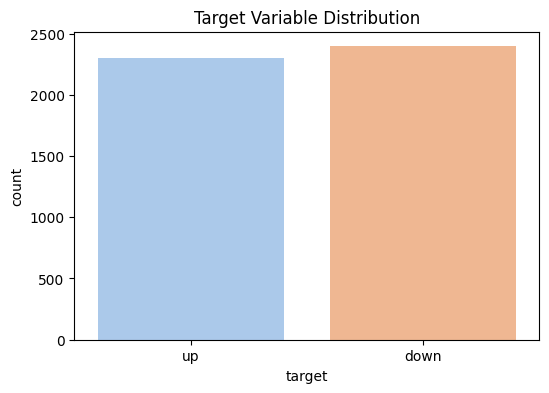

In [8]:
# Create the 'Plots' directory if it doesn't exist
os.makedirs("Plots", exist_ok=True)

# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette= 'pastel')
plt.title("Target Variable Distribution")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Target_Variable_Distribution.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**Target Distribution Pie Chart Visualization**

*  **Plot Target Distribution**: Visualizes the balance of the target variable (e.g., "up" vs. "down").
* **Insight**: Helps determine if there’s an imbalance in the classes, which could impact model performance.
  

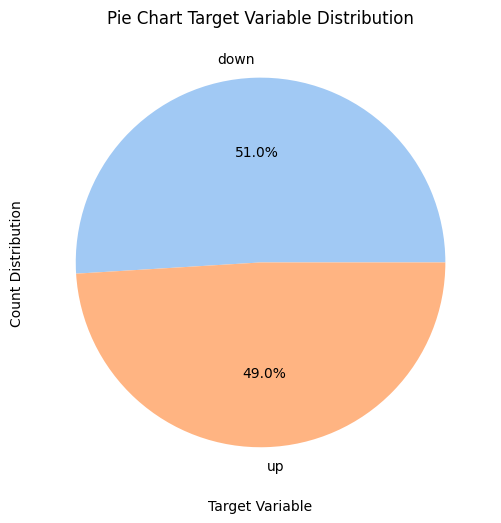

In [9]:
# Plot target variable distribution using matplotlib
plt.figure(figsize=(6, 6))  # Adjust figure size for better visibility
df['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))

# Add title, xlabel, and ylabel
plt.title("Pie Chart Target Variable Distribution")
plt.xlabel("Target Variable")
plt.ylabel("Count Distribution")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Pie_Chart_Target_Variable_Distribution.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()


**Generate a Word Cloud**


*   **Word Cloud**: Creates a visual of the most common words in the cleaned_text column.
* **Insight**: Provides a quick view of frequently occurring words, potentially relevant to stock prediction.




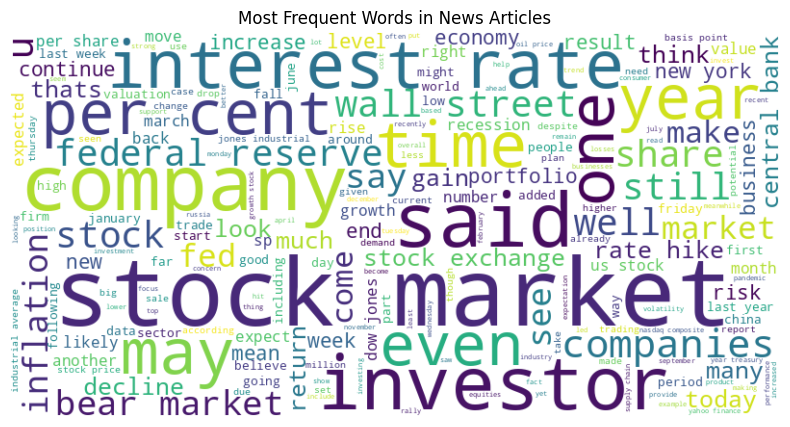

In [10]:
# Generate word cloud for most frequent words in 'cleaned_text'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in News Articles")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Most_Frequent_Words_in_News_Articles.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**Top N Words by Frequency**


*   **Common Words**: Finds the 20 most frequent words in the dataset.
*   **Visualization**: Displays these words and their counts in a bar chart.




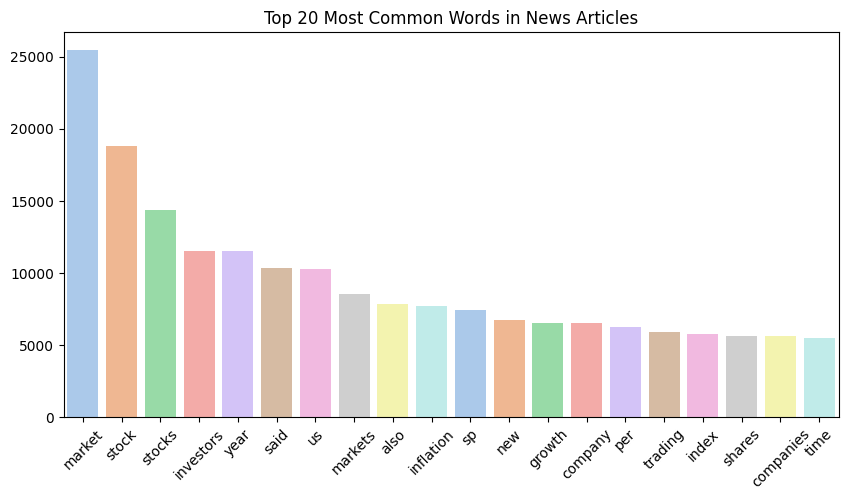

In [11]:
from collections import Counter

# Find top 20 most common words
all_words = " ".join(df['cleaned_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette= 'pastel')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in News Articles")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Top_20_Most_Common_Words_in_News_Articles.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**TF-IDF Vectorization**


*   **TF-IDF**: Transforms text data into a matrix of features based on term frequency-inverse document frequency.
*  **Purpose**: Converts text data into numerical features for model input.




In [12]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()


In [13]:
# Encode target variable (1 for "up", 0 for "down" - modify as necessary)
df['target_encoded'] = df['target'].apply(lambda x: 1 if x == 'up' else 0)
y = df['target_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5223404255319148

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       476
           1       0.52      0.47      0.49       464

    accuracy                           0.52       940
   macro avg       0.52      0.52      0.52       940
weighted avg       0.52      0.52      0.52       940



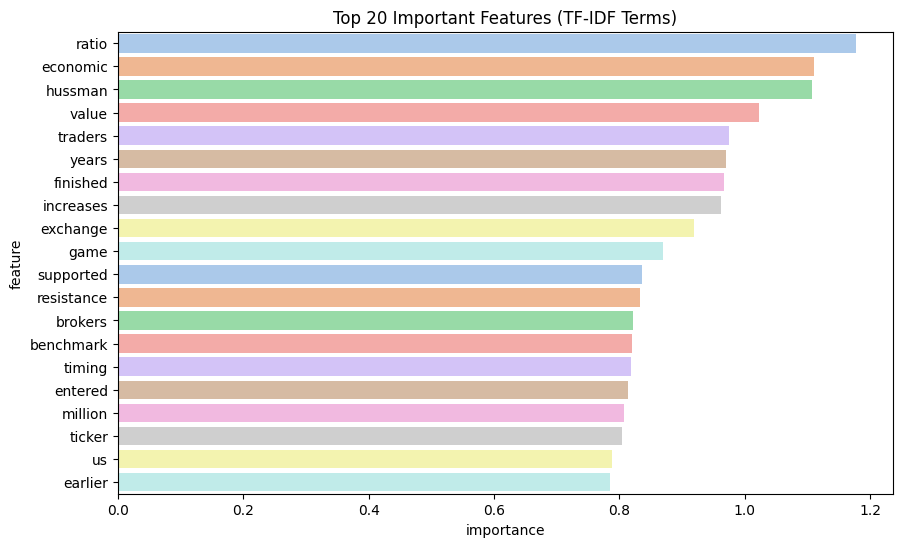

In [16]:
# Feature importance visualization for top TF-IDF terms
importance = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette="pastel")
plt.title("Top 20 Important Features (TF-IDF Terms)")

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Top_20_Important_Features_(TF-IDF_Terms).png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**Train Classification Models (Logistic Regression, Naive Bayes, Random Forest)**

Each block here initializes, trains, and evaluates a classification model.



1.   **Model Initialization**: Initializes each model (Logistic Regression, Naive Bayes, Random Forest).
2.  **Model Training**: Fits each model on the training data.
3.  **Prediction**: Makes predictions on the test data.



**Encode Target Variable and Split Data**


*   **Target Encoding**: Converts the target variable to numerical values.
*   **Train-Test Split**: Divides the data into training and testing sets, essential for evaluating model performance.
   



In [17]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create TF-IDF vectorizer with N-grams (unigrams and bigrams)
vectorizer_lr = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_lr = vectorizer_lr.fit_transform(df['cleaned_text']).toarray()

# Perform Grid Search with cross-validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
grid_lr.fit(X_lr, y)

# Get the best Logistic Regression model
best_lr_model = grid_lr.best_estimator_

# Evaluate the best model
y_pred_lr = best_lr_model.predict(X_lr)
print("Logistic Regression with Hyperparameter Tuning and N-grams:")
print("Best Parameters:", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y, y_pred_lr))
print(classification_report(y, y_pred_lr))

# Calculate and store accuracy for Logistic Regression
lr_accuracy = accuracy_score(y, y_pred_lr)

Logistic Regression with Hyperparameter Tuning and N-grams:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.6516280059587146
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      2395
           1       0.72      0.48      0.57      2304

    accuracy                           0.65      4699
   macro avg       0.67      0.65      0.64      4699
weighted avg       0.67      0.65      0.64      4699



In [18]:
# Define parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Create TF-IDF vectorizer with N-grams (unigrams and bigrams)
vectorizer_nb = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_nb = vectorizer_nb.fit_transform(df['cleaned_text']).toarray()

# Perform Grid Search with cross-validation
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
grid_nb.fit(X_nb, y)

# Get the best Naive Bayes model
best_nb_model = grid_nb.best_estimator_

# Evaluate the best model
y_pred_nb = best_nb_model.predict(X_nb)
print("\nNaive Bayes with Hyperparameter Tuning and N-grams:")
print("Best Parameters:", grid_nb.best_params_)
print("Accuracy:", accuracy_score(y, y_pred_nb))
print(classification_report(y, y_pred_nb))

# Calculate and store accuracy for Naive Bayes
nb_accuracy = accuracy_score(y, y_pred_nb)


Naive Bayes with Hyperparameter Tuning and N-grams:
Best Parameters: {'alpha': 2.0}
Accuracy: 0.6671632262183443
              precision    recall  f1-score   support

           0       0.65      0.77      0.70      2395
           1       0.70      0.56      0.62      2304

    accuracy                           0.67      4699
   macro avg       0.67      0.67      0.66      4699
weighted avg       0.67      0.67      0.66      4699



In [19]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create TF-IDF vectorizer with N-grams (unigrams and bigrams)
vectorizer_rf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_rf = vectorizer_rf.fit_transform(df['cleaned_text']).toarray()

# Perform Grid Search with cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                      scoring='accuracy')
grid_rf.fit(X_rf, y)

# Get the best Random Forest model
best_rf_model = grid_rf.best_estimator_

# Evaluate the best model
y_pred_rf = best_rf_model.predict(X_rf)
print("\nRandom Forest with Hyperparameter Tuning and N-grams:")
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y, y_pred_rf))
print(classification_report(y, y_pred_rf))

# Calculate and store accuracy for Random Forest
rf_accuracy = accuracy_score(y, y_pred_rf)


Random Forest with Hyperparameter Tuning and N-grams:
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9899978718876357
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2395
           1       1.00      0.98      0.99      2304

    accuracy                           0.99      4699
   macro avg       0.99      0.99      0.99      4699
weighted avg       0.99      0.99      0.99      4699



**Confusion Matrix Visualization**


1.   **Confusion Matrix**: Shows true positive, false positive, true negative, and false negative counts.
2.   **Purpose**: Helps understand each model’s performance in terms of correctly/incorrectly predicted classes.
   



**ROC Curve Visualization**



1.   **ROC Curve**: Plots true positive rate vs. false positive rate.
2.   **AUC Score**: Shows how well each model distinguishes between classes.





### Confusion Matrix for Logistic Regression

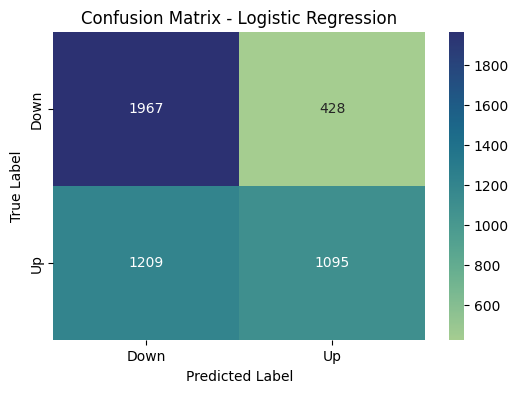

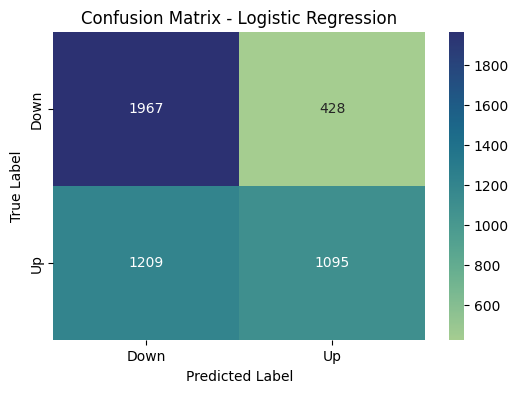

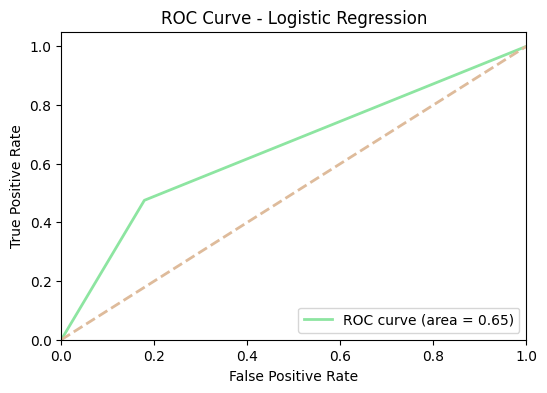

In [21]:
# Confusion Matrix for Logistic Regression with pastel color palette
cm_lr = confusion_matrix(y, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="crest",  # Updated to use pastel-like color
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y, y_pred_lr)  # Calculate fpr, tpr
roc_auc_lr = auc(fpr_lr, tpr_lr)  # Calculate AUC

# Confusion Matrix for Logistic Regression with pastel color palette
cm_lr = confusion_matrix(y, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="crest",  # Updated to use pastel-like color
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve for Logistic Regression with pastel theme
sns.set_palette("pastel")  # Set the pastel color theme for the plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color=sns.color_palette("pastel")[2], lw=2,  # Using pastel color
         label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color=sns.color_palette("pastel")[5], lw=2, linestyle='--')  # Another pastel color
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix for Naive Bayes

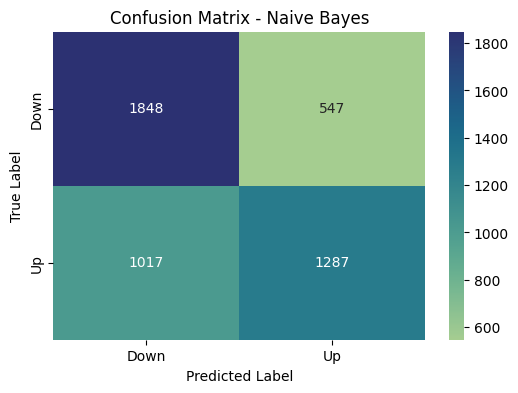

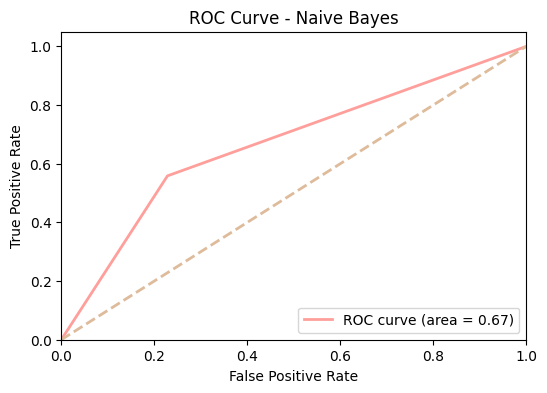

In [23]:
# Confusion Matrix for Naive Bayes with pastel color palette
cm_nb = confusion_matrix(y, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="crest",  # Updated to use a pastel-like color
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y, y_pred_nb)  # Calculate fpr, tpr for Naive Bayes
roc_auc_nb = auc(fpr_nb, tpr_nb)  # Calculate AUC for Naive Bayes

# ROC Curve for Naive Bayes with pastel theme
sns.set_palette("pastel")  # Set the pastel color theme for the plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, color=sns.color_palette("pastel")[3], lw=2,  # Using pastel color
         label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color=sns.color_palette("pastel")[5], lw=2, linestyle='--')  # Another pastel color
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix for Random Forest

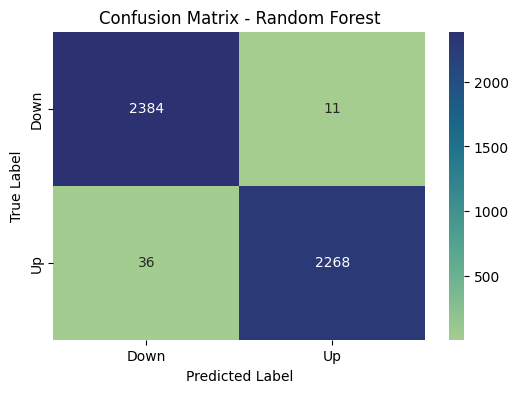

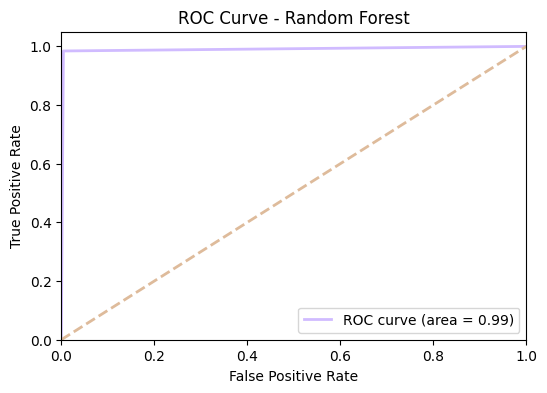

In [25]:
# Confusion Matrix for Random Forest with pastel color palette
cm_rf = confusion_matrix(y, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="crest",  # Updated to use a pastel-like color
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve for Random Forest with pastel theme
sns.set_palette("pastel")  # Set the pastel color theme for the plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color=sns.color_palette("pastel")[4], lw=2,  # Using pastel color
         label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color=sns.color_palette("pastel")[5], lw=2, linestyle='--')  # Another pastel color
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


**Feature Importance for Random Forest**
1. **Feature Importance**: Shows which words are most influential for the Random Forest model.
2. **Insight**: Useful to understand the words that impact predictions.

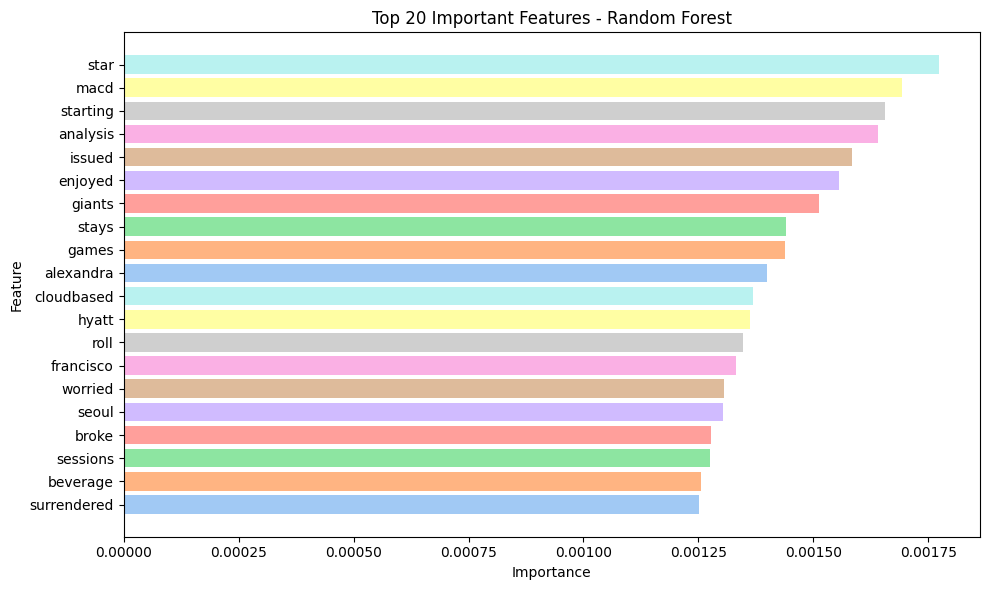

In [27]:
# Get feature importances from the Random Forest model
importances = best_rf_model.feature_importances_

# Get indices of the top 20 features
indices = np.argsort(importances)[-20:]

# Get feature names of the top 20 features
top_features = vectorizer.get_feature_names_out()[indices]

# Get the top 20 importances
top_importances = importances[indices]

# Use Seaborn's pastel color palette for the bars
colors = sns.color_palette("pastel", len(top_features))

# Plotting the top 20 features with pastel colors
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color=colors)
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()  # Ensures labels are not cut off

# Save the plot as a transparent PNG with the title as the filename
plot_path = os.path.join("Plots", "Top_20_Important_Features_Random_Forest.png")
plt.savefig(plot_path, transparent=True, dpi=300)

plt.show()

**Generate Summary Table**
1. **Summary Table**: Summarizes accuracy, precision, recall, F1-score, and AUC for each model.
2. **Purpose**: Provides a quick comparison of model performance.

In [28]:
# Create a dictionary of model accuracies
accuracy_data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [lr_accuracy, nb_accuracy, rf_accuracy]
}

# Create a Pandas DataFrame for the accuracy comparison table
accuracy_table = pd.DataFrame(accuracy_data)
accuracy_table

,Model,Accuracy
0,Logistic Regression,0.651628
1,Naive Bayes,0.667163
2,Random Forest,0.989998


In [29]:
# Convert the accuracy to percentage
accuracy_table['Accuracy'] = accuracy_table['Accuracy'] * 100

# Display the modified table
accuracy_table


,Model,Accuracy
0,Logistic Regression,65.162801
1,Naive Bayes,66.716323
2,Random Forest,98.999787


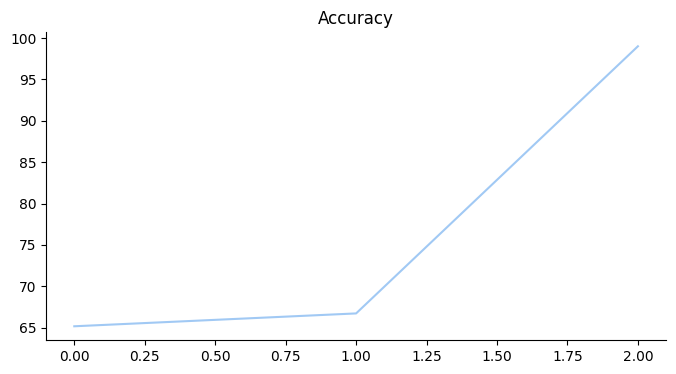

In [30]:
accuracy_table['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
accuracy_table.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('pastel'))
plt.gca().spines[['top', 'right',]].set_visible(False)

KeyError: "'pastel' is not a known colormap name"

### Saving the model for later use

In [32]:
# List of models and their corresponding names
models = [
    (best_nb_model, 'Naive_Bayes_Best_Model'),
    (best_lr_model, 'Logistic_Regression_Best_Model'),
    (best_rf_model, 'Random_Forest_Best_Model')
]

# Directories for saving models
pickle_directory = 'Models/Classification/pkl_models/'
joblib_directory = 'Models/Classification/joblib_models/'

# Create directories if they don't exist
os.makedirs(pickle_directory, exist_ok=True)
os.makedirs(joblib_directory, exist_ok=True)

# Save models using both pickle and joblib
for model, name in models:
    # Save using pickle
    with open(f'{pickle_directory}{name}.pkl', 'wb') as file:
        pickle.dump(model, file)

    # Save using joblib
    joblib.dump(model, f'{joblib_directory}{name}.joblib')

print("Models saved successfully.")

Models saved successfully.


In [33]:
import shutil
import os
from google.colab import files

# Define the source directories
models_dir = 'Models'
plots_dir = 'Plots'

# Define the destination directory
destination_dir = 'downloaded_files'  # Create a directory to hold the files

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the 'Models' directory
if os.path.exists(models_dir):
    shutil.copytree(models_dir, os.path.join(destination_dir, 'Models'), dirs_exist_ok=True)
else:
    print(f"Warning: '{models_dir}' directory not found. Skipping.")

# Copy the 'Plots' directory
if os.path.exists(plots_dir):
    shutil.copytree(plots_dir, os.path.join(destination_dir, 'Plots'), dirs_exist_ok=True)
else:
    print(f"Warning: '{plots_dir}' directory not found. Skipping.")

print(f"Files copied to '{destination_dir}'")

# Zip the 'downloaded_files' directory
!zip -r downloaded_files.zip downloaded_files

# Download the zipped file
files.download('downloaded_files.zip')

Files copied to 'downloaded_files'
  adding: downloaded_files/ (stored 0%)
  adding: downloaded_files/Plots/ (stored 0%)
  adding: downloaded_files/Plots/Pie_Chart_Target_Variable_Distribution.png (deflated 17%)
  adding: downloaded_files/Plots/Most_Frequent_Words_in_News_Articles.png (deflated 1%)
  adding: downloaded_files/Plots/Top_20_Important_Features_(TF-IDF_Terms).png (deflated 22%)
  adding: downloaded_files/Plots/Top_20_Most_Common_Words_in_News_Articles.png (deflated 16%)
  adding: downloaded_files/Plots/Top_20_Important_Features_Random_Forest.png (deflated 21%)
  adding: downloaded_files/Plots/Target_Variable_Distribution.png (deflated 25%)
  adding: downloaded_files/Models/ (stored 0%)
  adding: downloaded_files/Models/Classification/ (stored 0%)
  adding: downloaded_files/Models/Classification/joblib_models/ (stored 0%)
  adding: downloaded_files/Models/Classification/joblib_models/Naive_Bayes_Best_Model.joblib (deflated 8%)
  adding: downloaded_files/Models/Classification

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>